In [ ]:
from google.colab import files
uploaded = files.upload()


Saving GovernmentTotalExpenditure (1).csv to GovernmentTotalExpenditure (1).csv
Saving GovernmentExpenditurebyType.csv to GovernmentExpenditurebyType.csv
Saving GovernmentManpower.csv to GovernmentManpower.csv
Saving GovernmentOperatingRevenue.csv to GovernmentOperatingRevenue.csv
Saving GovernmentFiscalPosition.csv to GovernmentFiscalPosition.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the datasets into pandas DataFrames
manpower = pd.read_csv('GovernmentManpower.csv')
revenue = pd.read_csv('GovernmentOperatingRevenue.csv')
fiscal_position = pd.read_csv('GovernmentFiscalPosition.csv')


# Display the first few rows to ensure they loaded correctly
print("Manpower Data:")
print(manpower.head())

print("\nRevenue Data:")
print(revenue.head())

print("\nFiscal Position Data:")
print(fiscal_position.head())


Manpower Data:
   financial_year actual_revised_estimated                     ministry  \
0            1997                   Actual  Attorney-General's Chambers   
1            1998                   Actual  Attorney-General's Chambers   
2            1999                   Actual  Attorney-General's Chambers   
3            2000                   Actual  Attorney-General's Chambers   
4            2001                   Actual  Attorney-General's Chambers   

   number  
0     185  
1     212  
2     209  
3     212  
4     255  

Revenue Data:
   financial_year actual_revised_estimated             class  \
0            1997                   Actual  Fees and Charges   
1            1998                   Actual  Fees and Charges   
2            1999                   Actual  Fees and Charges   
3            2000                   Actual  Fees and Charges   
4            2001                   Actual  Fees and Charges   

                                                type  amount  

In [ ]:
expenditure_df = pd.read_csv('GovernmentExpenditurebyType.csv')
total_expenditure_df = pd.read_csv('GovernmentTotalExpenditure (1).csv')

In [ ]:
print("Expenditure Data:")
print(expenditure_df.head())

print("\nTotal Expenditure Data:")
print(total_expenditure_df.head())

Expenditure Data:
   financial_year actual_revised_estimated         type  \
0            1997                   Actual  Development   
1            1998                   Actual  Development   
2            1999                   Actual  Development   
3            2000                   Actual  Development   
4            2001                   Actual  Development   

                  category                   class  amount  
0  Development Expenditure  Government Development    5326  
1  Development Expenditure  Government Development    6981  
2  Development Expenditure  Government Development    6369  
3  Development Expenditure  Government Development    5464  
4  Development Expenditure  Government Development    4503  

Total Expenditure Data:
   financial_year actual_revised_estimated                sector  \
0            1997                   Actual  Economic Development   
1            1998                   Actual  Economic Development   
2            1999               

#Initial Data Cleaning
1. Inspect for Missing Values and Data **Types**

In [ ]:
# Check for missing values
print("\nMissing Values in Manpower Data:")
print(manpower.isnull().sum())

print("\nMissing Values in Revenue Data:")
print(revenue.isnull().sum())

print("\nMissing Values in Fiscal Position Data:")
print(fiscal_position.isnull().sum())

# Check data types to ensure consistency
print("\nData Types in Manpower Data:")
print(manpower.dtypes)
# Check for missing values
print(expenditure_df.isnull().sum())
print(total_expenditure_df.isnull().sum())


Missing Values in Manpower Data:
financial_year              0
actual_revised_estimated    0
ministry                    0
number                      0
dtype: int64

Missing Values in Revenue Data:
financial_year              0
actual_revised_estimated    0
class                       0
type                        0
amount                      0
percent_of_gdp              0
dtype: int64

Missing Values in Fiscal Position Data:
year_of_balance             0
actual_revised_estimated    0
category                    0
item                        0
amount                      0
percent_of_gdp              0
dtype: int64

Data Types in Manpower Data:
financial_year               int64
actual_revised_estimated    object
ministry                    object
number                       int64
dtype: object
financial_year              0
actual_revised_estimated    0
type                        0
category                    0
class                       0
amount                      0
dtype: in

#2. Standardize Column Names

In [ ]:
# Make column names lowercase and replace spaces with underscores
manpower.columns = manpower.columns.str.lower().str.replace(' ', '_')
revenue.columns = revenue.columns.str.lower().str.replace(' ', '_')
fiscal_position.columns = fiscal_position.columns.str.lower().str.replace(' ', '_')


#Handle Missing Values

Drop or fill missing data where needed.

In [ ]:
manpower = manpower.dropna()  # Drop missing rows (or use fillna() to fill)
revenue = revenue.fillna(0)  # Example: Fill missing revenue with 0
fiscal_position = fiscal_position.fillna(0)


In [ ]:
#Convert Year Columns to Date Format (if needed):
manpower.rename(columns={'financial_year': 'year'}, inplace=True)
revenue.rename(columns={'financial_year': 'year'}, inplace=True)
fiscal_position.rename(columns={'year_of_balance': 'year'}, inplace=True)



In [ ]:
print("Manpower Data Columns:", manpower.columns)
print("Revenue Data Columns:", revenue.columns)
print("Fiscal Position Data Columns:", fiscal_position.columns)


Manpower Data Columns: Index(['year', 'actual_revised_estimated', 'ministry', 'number'], dtype='object')
Revenue Data Columns: Index(['year', 'actual_revised_estimated', 'class', 'type', 'amount',
       'percent_of_gdp'],
      dtype='object')
Fiscal Position Data Columns: Index(['year', 'actual_revised_estimated', 'category', 'item', 'amount',
       'percent_of_gdp'],
      dtype='object')


#Visualization

#1-Government Manpower Insights Visualizations


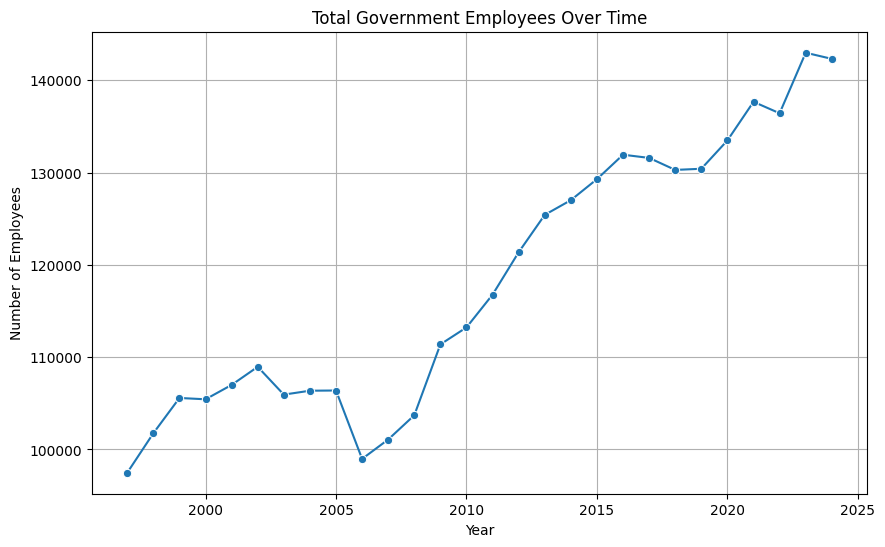

In [ ]:
#Plot Total Government Employees Over Time
total_employees = manpower.groupby('year')['number'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_employees, marker='o')
plt.title('Total Government Employees Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()


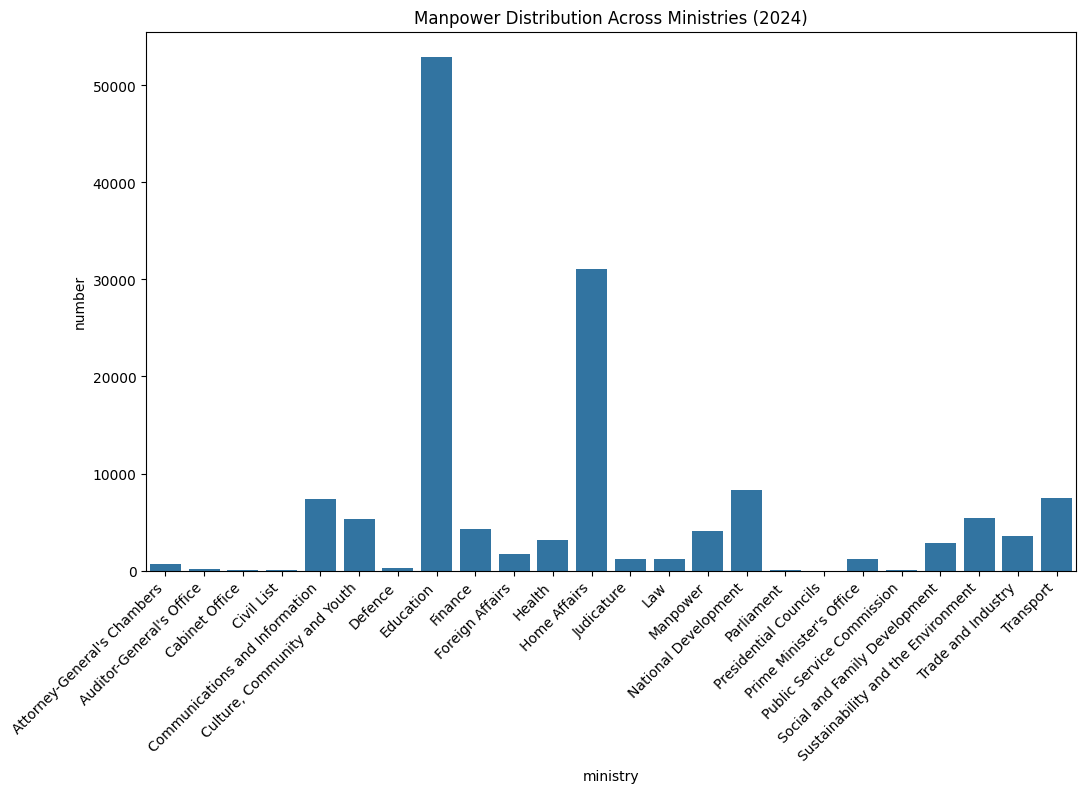

In [ ]:
#Manpower Distribution Across Ministries
latest_year = manpower['year'].max()
manpower_latest = manpower[manpower['year'] == latest_year]

plt.figure(figsize=(12, 7))
sns.barplot(data=manpower_latest, x='ministry', y='number')
plt.title(f'Manpower Distribution Across Ministries ({latest_year})') # Changed this line
plt.xticks(rotation=45, ha='right')
plt.show()

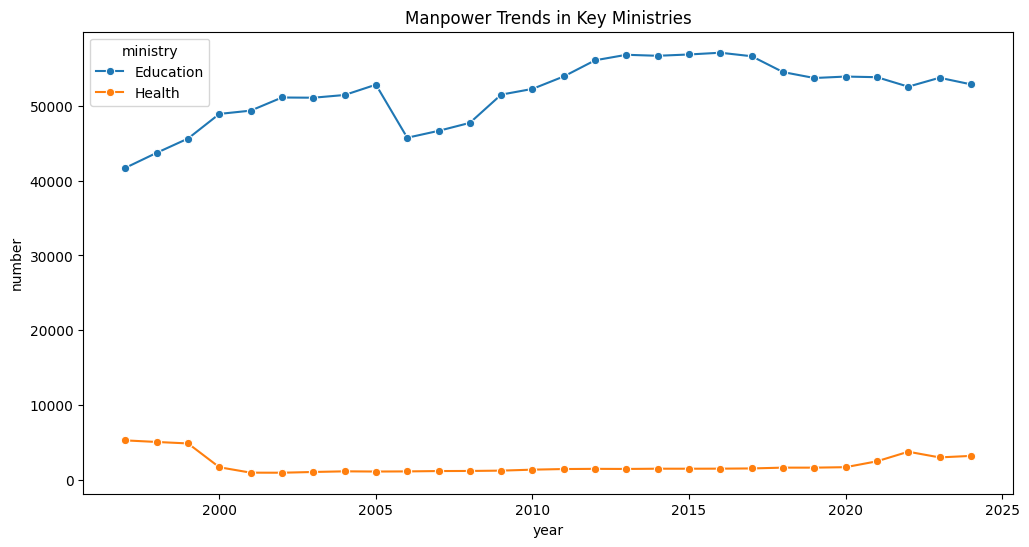

In [ ]:
#Trends in Key Ministries Over Time
key_ministries = ['Health', 'Education', 'Defense']
key_ministry_data = manpower[manpower['ministry'].isin(key_ministries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=key_ministry_data, x='year', y='number', hue='ministry', marker='o')
plt.title('Manpower Trends in Key Ministries')
plt.show()


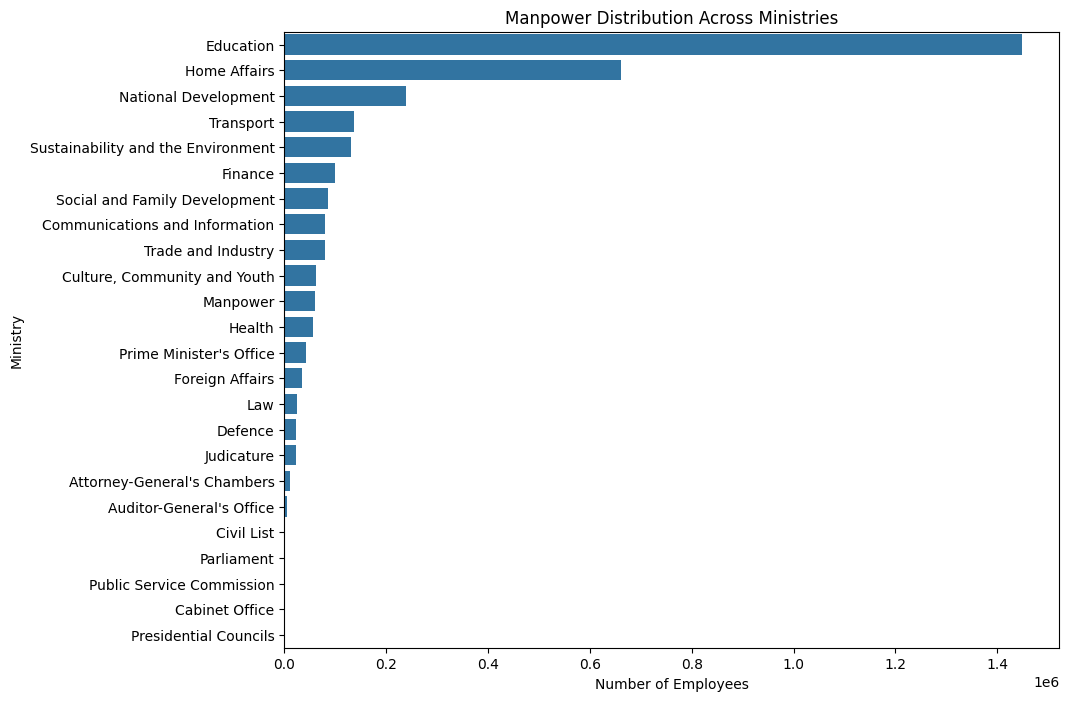

In [ ]:
# 2. Manpower distribution across various ministries
ministry_distribution = manpower.groupby('ministry')['number'].sum().reset_index()
# Plot the distribution of manpower across ministries
plt.figure(figsize=(10, 8))
sns.barplot(x='number', y='ministry', data=ministry_distribution.sort_values('number', ascending=False))
plt.title('Manpower Distribution Across Ministries')
plt.xlabel('Number of Employees')
plt.ylabel('Ministry')
plt.show()

#Government Operating Revenue Analysis

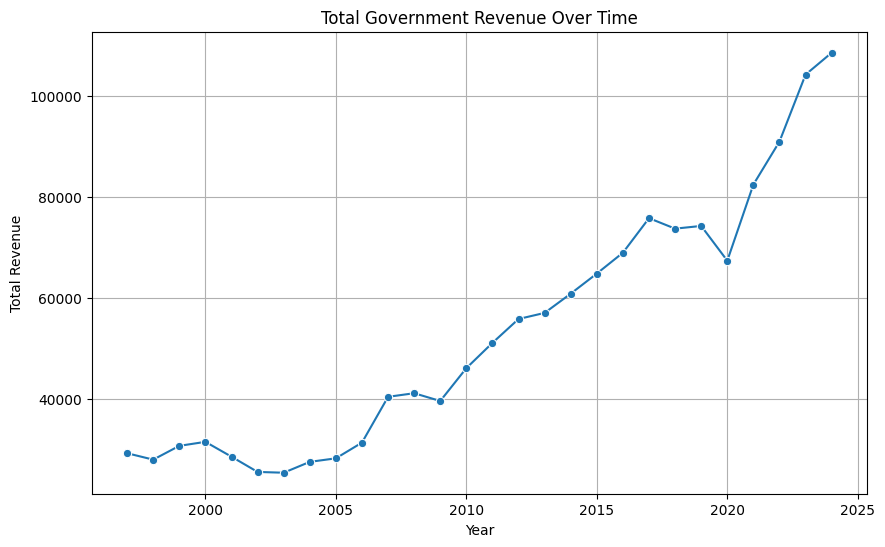

In [ ]:
#total Government Revenue Over Time
total_revenue = revenue.groupby('year')['amount'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_revenue, marker='o')
plt.title('Total Government Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


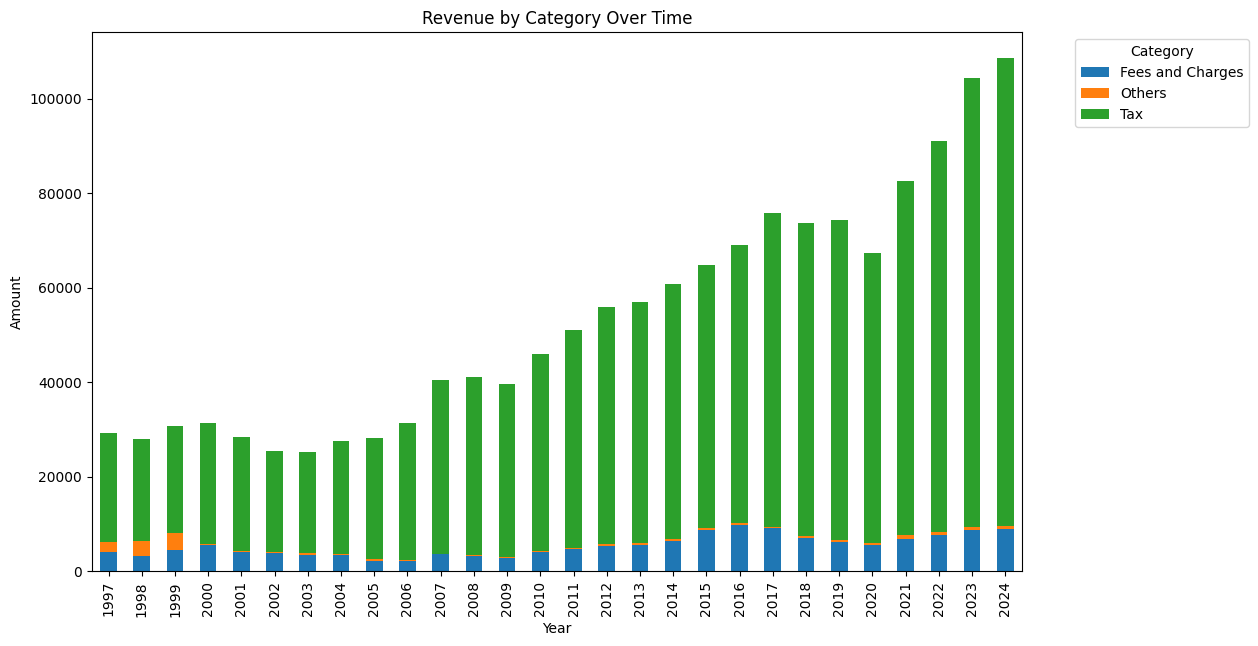

In [ ]:
# Bar Chart of Revenue Categories by Year
# Check if 'financial_year' is in the columns, if not, use 'year' instead
group_column = 'financial_year' if 'financial_year' in revenue.columns else 'year'

revenue_by_category = revenue.groupby([group_column, 'class'])['amount'].sum().unstack()

revenue_by_category.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Revenue by Category Over Time')
plt.xlabel(group_column.replace('_', ' ').title()) # Format the x-axis label
plt.ylabel('Amount')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

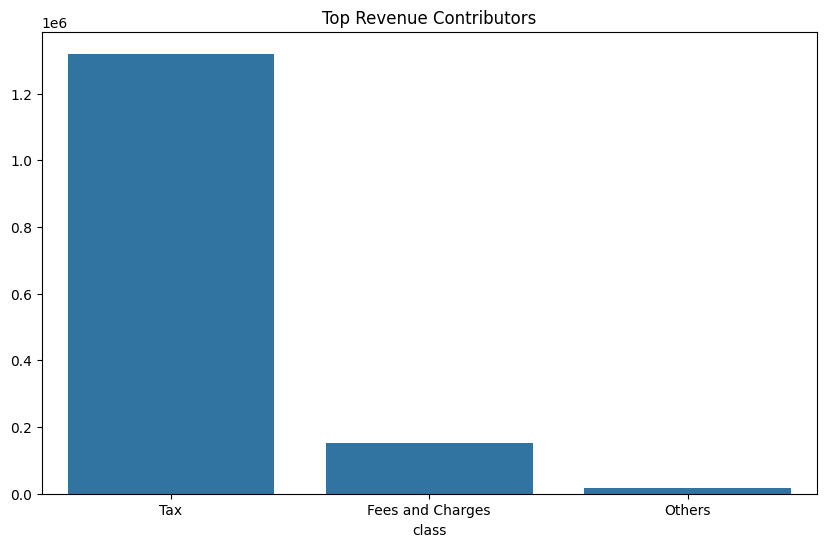

In [ ]:
#Top Revenue Contributors Annually
top_revenue_contributors = revenue.groupby('class')['amount'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_revenue_contributors.index, y=top_revenue_contributors.values)
plt.title('Top Revenue Contributors')
plt.show()


#Fiscal Position Overview

In [ ]:
#Government Fiscal Balance Over Time
plt.figure(figsize=(10, 6))
# Check if 'basic_balance' is a column in fiscal_position
print(fiscal_position.columns)  # Print columns to check for 'basic_balance'



Index(['year', 'actual_revised_estimated', 'category', 'item', 'amount',
       'percent_of_gdp'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

In [ ]:
print(fiscal_position.columns)


Index(['year', 'actual_revised_estimated', 'category', 'item', 'amount',
       'percent_of_gdp'],
      dtype='object')


In [ ]:
print(fiscal_position['item'].unique())
print(fiscal_position['category'].unique())


['Basic Balance' 'Overall Budget Balance' 'Overall Fiscal Position'
 'Primary Balance'
 'Capitalisation of Nationally Significant Infrastructure'
 'Depreciation of Nationally Significant Infrastructure'
 'SINGA Interest Costs and Loan Expenses'
 'Special Transfers Excluding Top-ups to Endowment and Trust Funds'
 'Top-ups to Endowment and Trust Funds' 'Total Expenditure'
 'Net Investment Income/Returns Contribution' 'Operating Revenue']
['Balance' 'Expenditure' 'Revenue']


In [ ]:
print(fiscal_position.columns)


Index(['year', 'actual_revised_estimated', 'category', 'item', 'amount',
       'percent_of_gdp'],
      dtype='object')


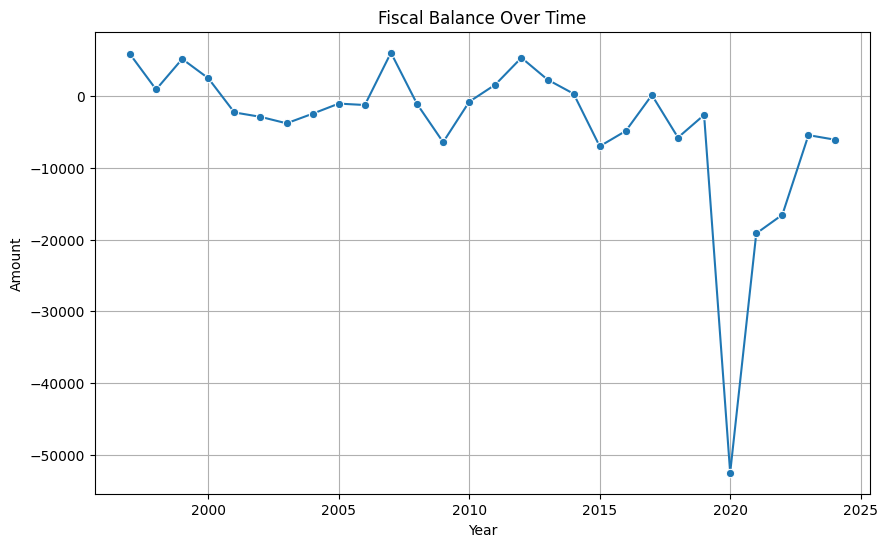

In [ ]:
# Filter the DataFrame to focus on the relevant fiscal balance item
fiscal_balance = fiscal_position[fiscal_position['item'] == 'Basic Balance']

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=fiscal_balance, x='year', y='amount', marker='o')
plt.title('Fiscal Balance Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


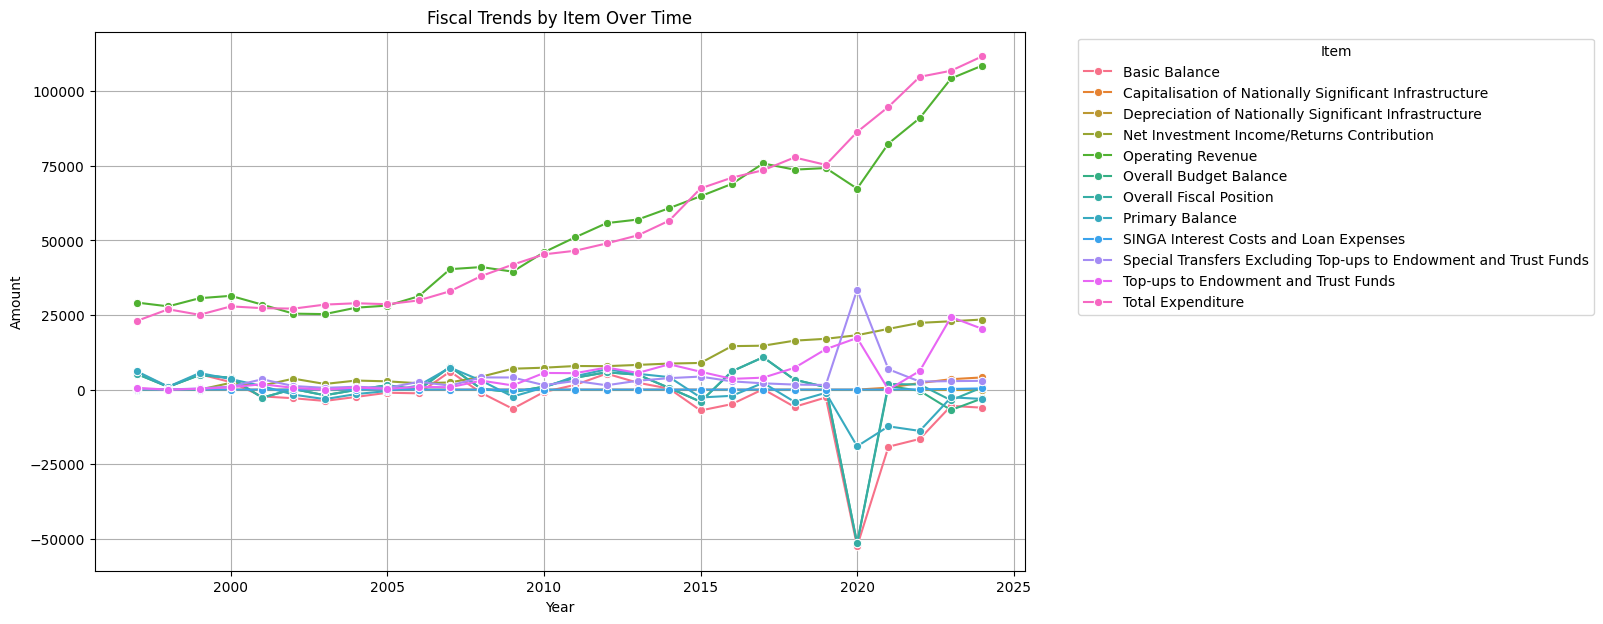

In [ ]:
# Aggregate amount by year and item (for a general fiscal overview)
aggregated_fiscal = fiscal_position.groupby(['year', 'item'])['amount'].sum().reset_index()

# Plot fiscal trends for all items
plt.figure(figsize=(12, 7))
sns.lineplot(data=aggregated_fiscal, x='year', y='amount', hue='item', marker='o')
plt.title('Fiscal Trends by Item Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


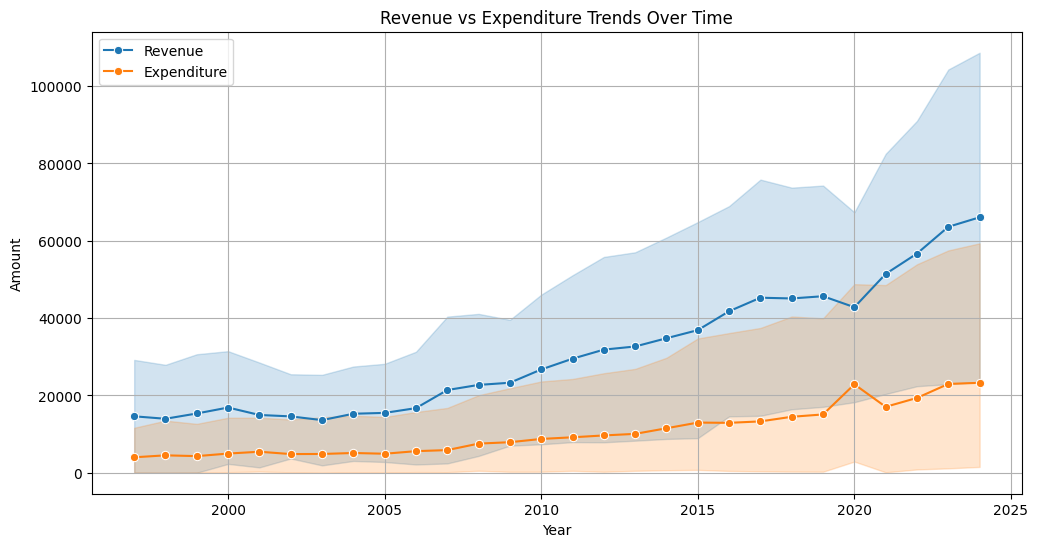

In [ ]:
# Filter for Revenue and Expenditure categories
revenue_data = fiscal_position[fiscal_position['category'] == 'Revenue']
expenditure_data = fiscal_position[fiscal_position['category'] == 'Expenditure']

# Plot Revenue vs Expenditure trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_data, x='year', y='amount', label='Revenue', marker='o')
sns.lineplot(data=expenditure_data, x='year', y='amount', label='Expenditure', marker='o')
plt.title('Revenue vs Expenditure Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Display the fiscal balance Series
print(fiscal_balance)

# Check the data type of the fiscal balance Series
print(fiscal_balance.dtypes)


    year actual_revised_estimated category           item  amount  \
0   1997                   Actual  Balance  Basic Balance    5852   
1   1998                   Actual  Balance  Basic Balance     925   
2   1999                   Actual  Balance  Basic Balance    5185   
3   2000                   Actual  Balance  Basic Balance    2496   
4   2001                   Actual  Balance  Basic Balance   -2273   
5   2002                   Actual  Balance  Basic Balance   -2885   
6   2003                   Actual  Balance  Basic Balance   -3788   
7   2004                   Actual  Balance  Basic Balance   -2448   
8   2005                   Actual  Balance  Basic Balance   -1041   
9   2006                   Actual  Balance  Basic Balance   -1238   
10  2007                   Actual  Balance  Basic Balance    6051   
11  2008                   Actual  Balance  Basic Balance   -1093   
12  2009                   Actual  Balance  Basic Balance   -6416   
13  2010                   Actual 

In [ ]:
# Display the fiscal balance variable
print(fiscal_balance)


    year actual_revised_estimated category           item  amount  \
0   1997                   Actual  Balance  Basic Balance    5852   
1   1998                   Actual  Balance  Basic Balance     925   
2   1999                   Actual  Balance  Basic Balance    5185   
3   2000                   Actual  Balance  Basic Balance    2496   
4   2001                   Actual  Balance  Basic Balance   -2273   
5   2002                   Actual  Balance  Basic Balance   -2885   
6   2003                   Actual  Balance  Basic Balance   -3788   
7   2004                   Actual  Balance  Basic Balance   -2448   
8   2005                   Actual  Balance  Basic Balance   -1041   
9   2006                   Actual  Balance  Basic Balance   -1238   
10  2007                   Actual  Balance  Basic Balance    6051   
11  2008                   Actual  Balance  Basic Balance   -1093   
12  2009                   Actual  Balance  Basic Balance   -6416   
13  2010                   Actual 

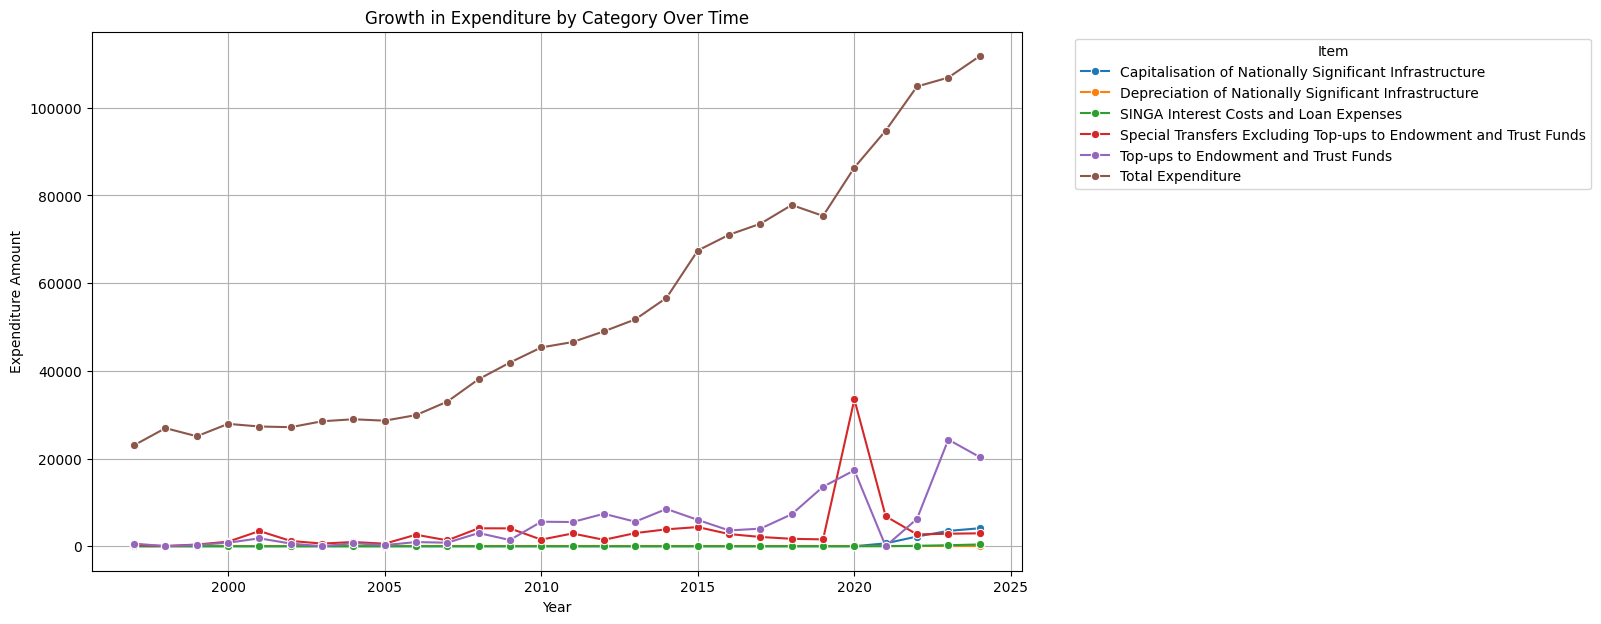

In [ ]:
# Filter for Expenditure categories
expenditure = fiscal_position[fiscal_position['category'] == 'Expenditure']

# Plot the trends for different items under expenditure
plt.figure(figsize=(12, 7))
sns.lineplot(data=expenditure, x='year', y='amount', hue='item', marker='o')
plt.title('Growth in Expenditure by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Expenditure Amount')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


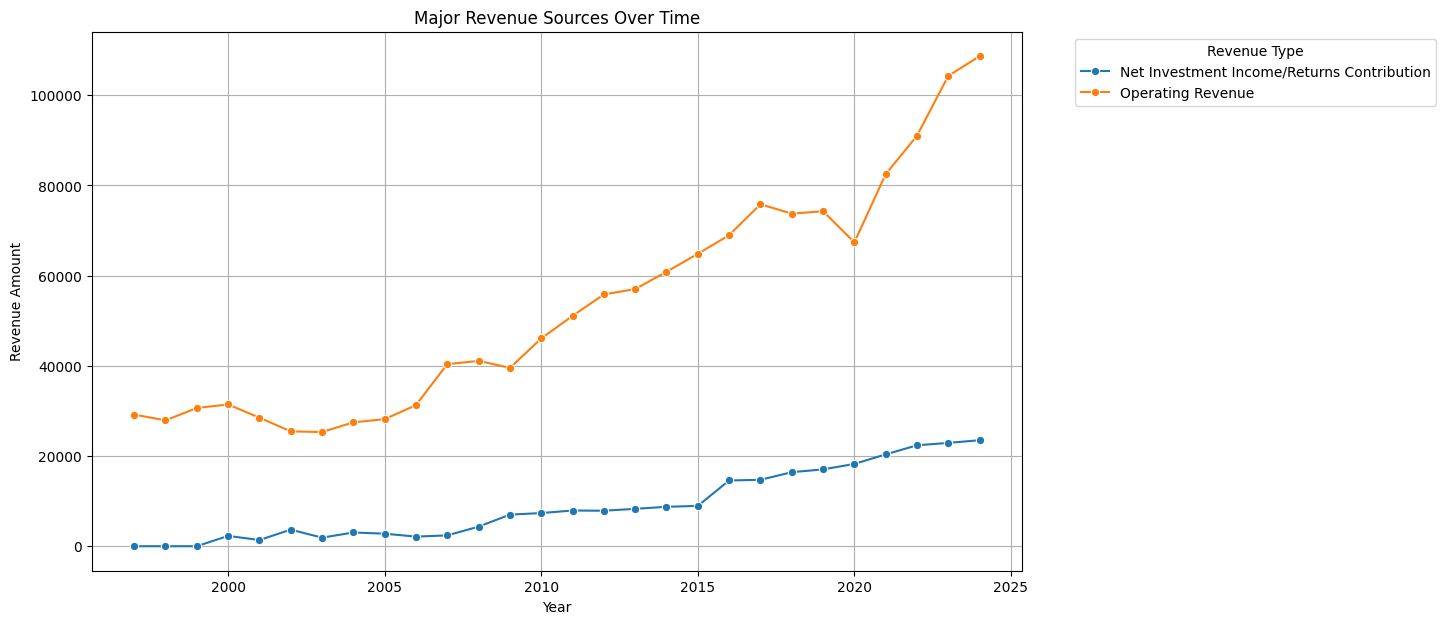

In [ ]:
# Filter for Revenue categories and aggregate by year and item
revenue = fiscal_position[fiscal_position['category'] == 'Revenue']
revenue_grouped = revenue.groupby(['year', 'item'])['amount'].sum().reset_index()

# Plot revenue trends by item
plt.figure(figsize=(12, 7))
sns.lineplot(data=revenue_grouped, x='year', y='amount', hue='item', marker='o')
plt.title('Major Revenue Sources Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue Amount')
plt.legend(title='Revenue Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


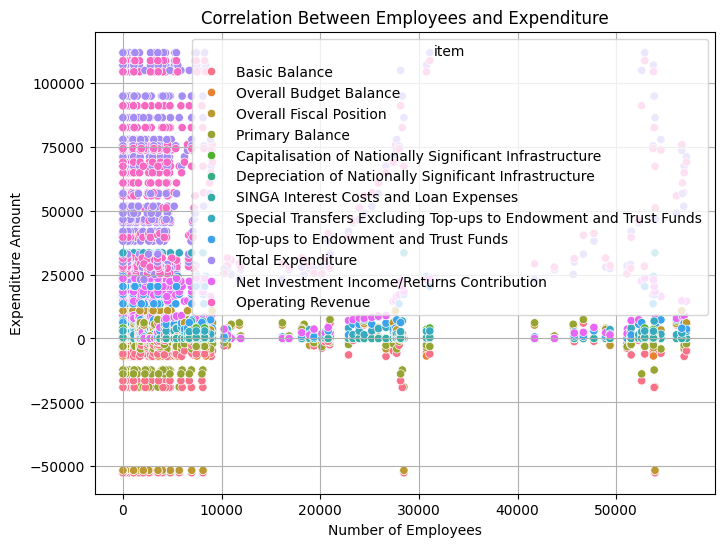

In [ ]:
# Merge manpower and fiscal data for correlation analysis
merged_data = pd.merge(manpower, fiscal_position, on='year', how='inner')

# Plot correlation between employees and expenditure
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='number', y='amount', hue='item')
plt.title('Correlation Between Employees and Expenditure')
plt.xlabel('Number of Employees')
plt.ylabel('Expenditure Amount')
plt.grid(True)
plt.show()


<ipython-input-50-77e5b6325118>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deficit_years.index, y=deficit_years['deficit'], palette='Reds')


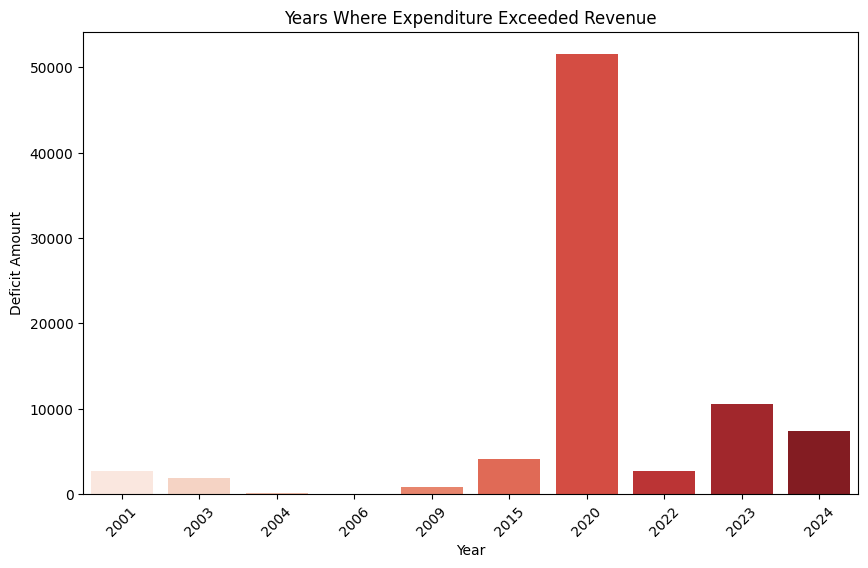

In [ ]:
# Aggregate revenue and expenditure by year
revenue_sum = revenue.groupby('year')['amount'].sum()
expenditure_sum = expenditure.groupby('year')['amount'].sum()

# Calculate the deficit or surplus
fiscal_summary = pd.DataFrame({'revenue': revenue_sum, 'expenditure': expenditure_sum})
fiscal_summary['deficit'] = fiscal_summary['expenditure'] - fiscal_summary['revenue']

# Plot the years where expenditure exceeded revenue
deficit_years = fiscal_summary[fiscal_summary['deficit'] > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=deficit_years.index, y=deficit_years['deficit'], palette='Reds')
plt.title('Years Where Expenditure Exceeded Revenue')
plt.xlabel('Year')
plt.ylabel('Deficit Amount')
plt.xticks(rotation=45)
plt.show()


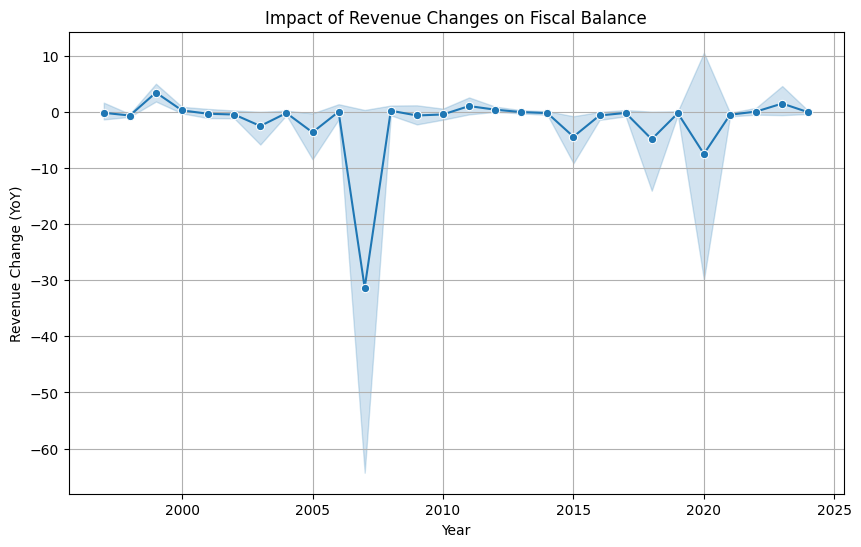

In [ ]:
# Calculate year-over-year changes in revenue and fiscal balance
fiscal_position['revenue_change'] = fiscal_position['amount'].pct_change()

# Plot the impact of revenue changes on fiscal balance
plt.figure(figsize=(10, 6))
sns.lineplot(data=fiscal_position, x='year', y='revenue_change', marker='o')
plt.title('Impact of Revenue Changes on Fiscal Balance')
plt.xlabel('Year')
plt.ylabel('Revenue Change (YoY)')
plt.grid(True)
plt.show()


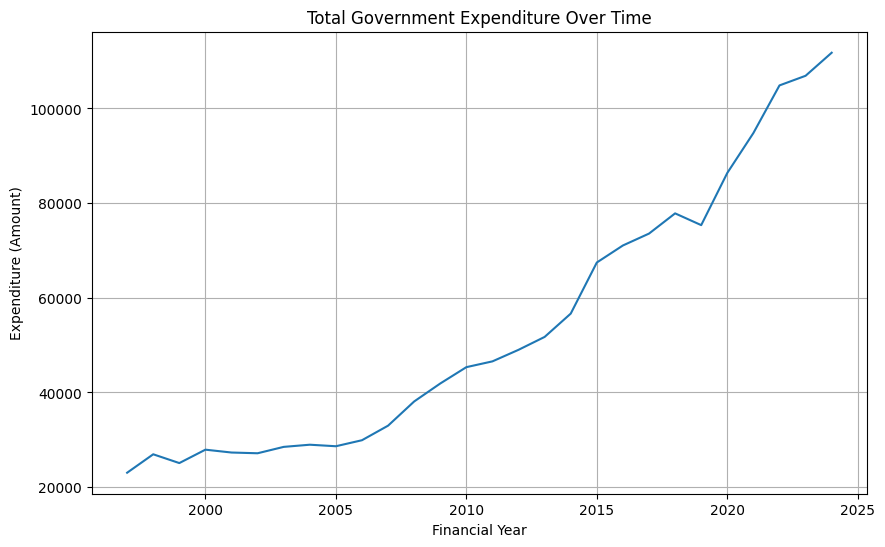

In [ ]:
# Summing up total expenditure by financial year in total_expenditure_df
total_expenditure_per_year = total_expenditure_df.groupby('financial_year')['amount'].sum()

# Plotting the total expenditure over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(total_expenditure_per_year.index, total_expenditure_per_year.values)
plt.title('Total Government Expenditure Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Expenditure (Amount)')
plt.grid(True)
plt.show()


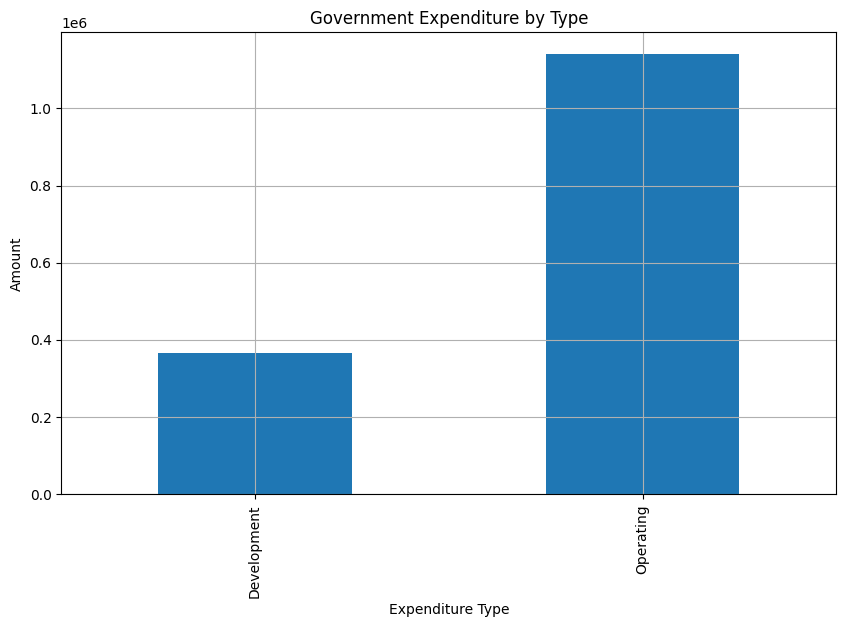

In [ ]:
# Summing expenditure by type for a specific year or overall
expenditure_by_type = expenditure_df.groupby('type')['amount'].sum()

# Plotting the expenditure by type
expenditure_by_type.plot(kind='bar', figsize=(10,6))
plt.title('Government Expenditure by Type')
plt.xlabel('Expenditure Type')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


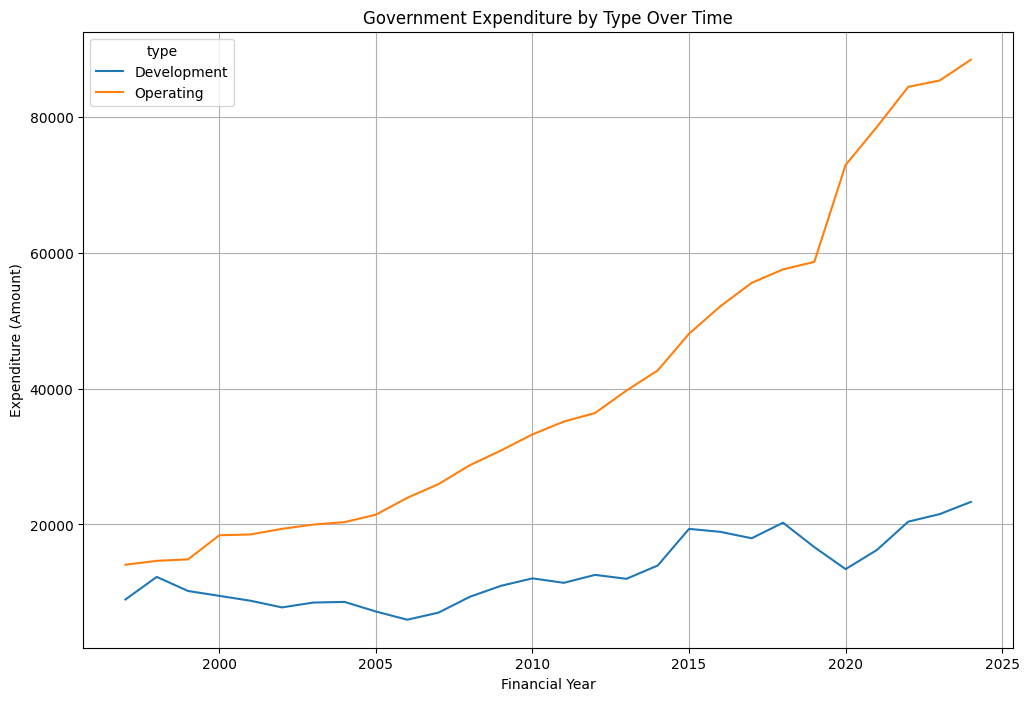

In [ ]:
#  compare specific types over time
expenditure_by_year_and_type = expenditure_df.groupby(['financial_year', 'type'])['amount'].sum().unstack()

# Plot the expenditure by type over time
expenditure_by_year_and_type.plot(kind='line', figsize=(12,8))
plt.title('Government Expenditure by Type Over Time')
plt.xlabel('Financial Year')
plt.ylabel('Expenditure (Amount)')
plt.grid(True)
plt.show()


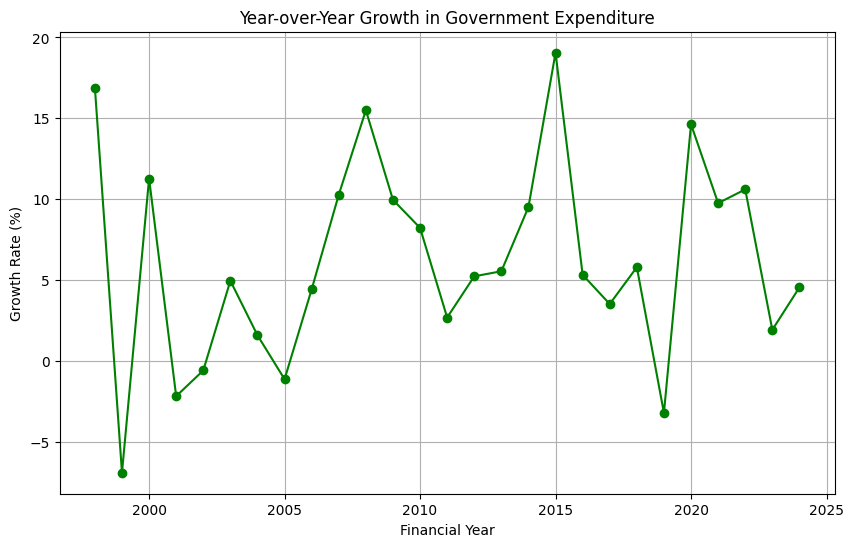

In [ ]:
# Calculating the year-over-year growth rate
total_expenditure_per_year = total_expenditure_df.groupby('financial_year')['amount'].sum()
yoy_growth = total_expenditure_per_year.pct_change() * 100

# Plotting the Year-over-Year (YoY) growth rate
plt.figure(figsize=(10,6))
plt.plot(yoy_growth.index, yoy_growth.values, marker='o', color='g')
plt.title('Year-over-Year Growth in Government Expenditure')
plt.xlabel('Financial Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


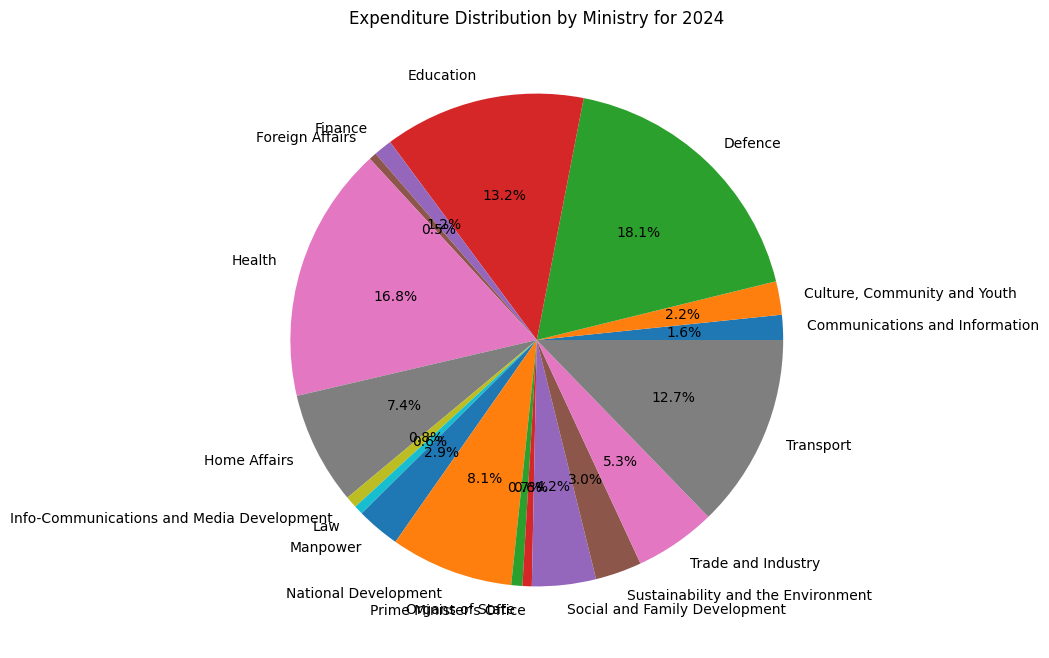

In [ ]:
# Filtering the most recent year, and then grouping by ministry
latest_year = total_expenditure_df['financial_year'].max()
expenditure_by_ministry = total_expenditure_df[total_expenditure_df['financial_year'] == latest_year].groupby('ministry')['amount'].sum()

# Plotting as a pie chart
expenditure_by_ministry.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title(f'Expenditure Distribution by Ministry for {latest_year}')
plt.ylabel('')  # Hides the 'y' label for pie chart
plt.show()
